# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
import re

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [100]:
temp = pd.read_csv('Temp_States.csv')

#### Print `temp`

In [101]:
print(temp)

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [102]:
print(temp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes
None


> Tenemos tres columnas: La primera y la segunda con strings y la tercera con floats.
> No tenemos ningún dato null

#### Select the rows where state is New York

In [103]:
ny = temp.loc[temp["State"]=="New York"]
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [107]:
ny["Temperature"].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [54]:
abovefift = temp.loc[(temp["Temperature"] >15), ["City", "State", "Temperature"]]
abovefift.head()

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [57]:
abovefiftcity = temp.loc[(temp["Temperature"] >15), ["City", "Temperature"]]
abovefiftcity.head()

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [61]:
bet = temp.loc[(temp["Temperature"] >15) & (temp["Temperature"] <20)]
bet.head()

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [69]:
mean_dev = temp.groupby("State").agg({"Temperature": [np.mean, np.std]})
mean_dev.head()

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

In [112]:
temp.groupby("State").agg(["mean","std"])

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [74]:
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [75]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


In [97]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [86]:
np.histogram(employee["Years"], bins=4)

(array([4, 2, 0, 3]), array([1.  , 2.75, 4.5 , 6.25, 8.  ]))

<function matplotlib.pyplot.show(close=None, block=None)>

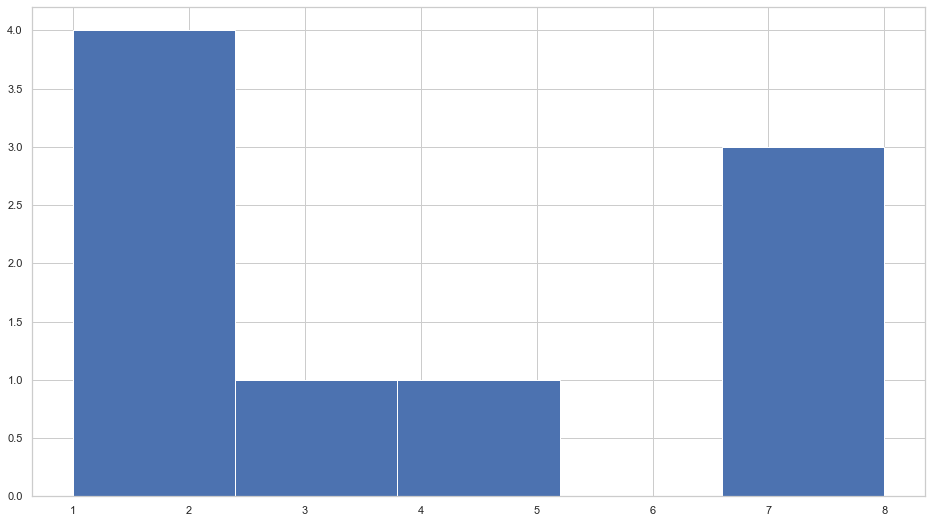

In [150]:
plt.hist(employee["Years"],bins=5)
plt.show

> La mayor parte de la gente es recién contratada. También tenemos a un gran número de roockies.

<function matplotlib.pyplot.show(close=None, block=None)>

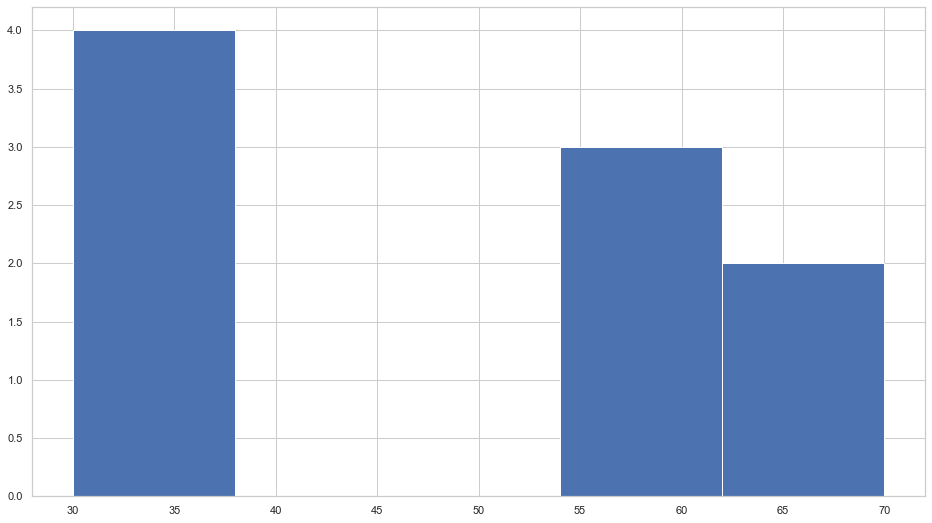

In [151]:
plt.hist(employee["Salary"],bins=5)
plt.show

> La mayor parte de nuestros empleados cobran por encima de 55

#### What's the average salary in this company?

In [114]:
print(employee["Salary"].mean())

48.888888888888886


#### What's the highest salary?

In [115]:
print(employee["Salary"].max())

70


#### What's the lowest salary?

In [116]:
print(employee["Salary"].min())

30


#### Who are the employees with the lowest salary?

In [121]:
emin = employee.loc[employee["Salary"]==30]
emin

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [124]:
david = employee.loc[employee["Name"]=="David"]
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [133]:
davidsalary = employee["Salary"][employee["Name"]=="David"]
davidsalary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [135]:
ass = employee.loc[employee["Title"]=="associate"]
ass

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [136]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [139]:
employee[employee.index < 3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [140]:
assabove = employee.loc[employee["Title"]=="associate"][employee["Salary"]>55]
assabove

/var/folders/lp/_3blnsw12kj309tphctgyqlr0000gn/T/ipykernel_18122/2203349727.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  assabove = employee.loc[employee["Title"]=="associate"][employee["Salary"]>55]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [142]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [141]:
group = employee.groupby("Years").agg({"Salary": [np.mean]})
group

,Salary
,mean
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [148]:
title = employee.groupby("Title").agg({"Salary": [np.mean]})
title

,Salary
,mean
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

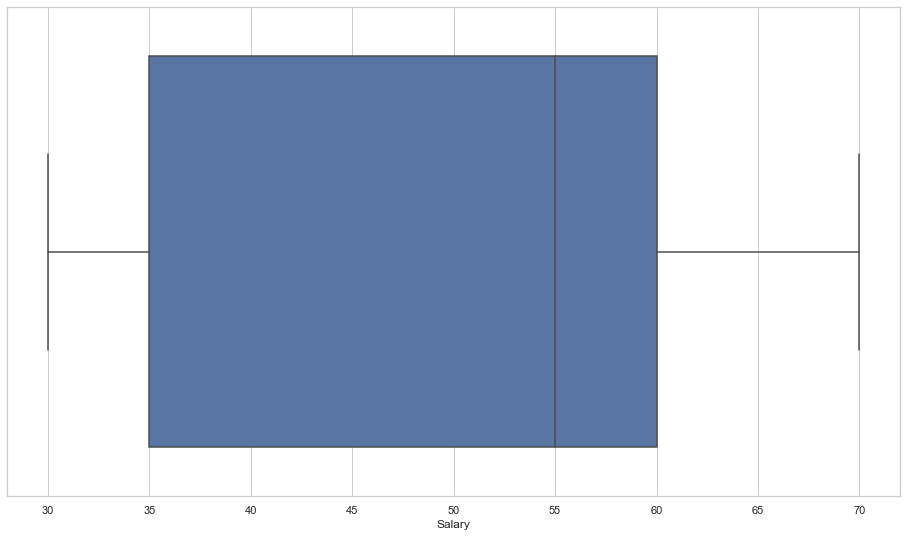

In [152]:
sns.boxplot(x="Salary", data=employee, hue="Gender");

> El primer quartil nos indica que el 25% de la gente cobra menos de 35
> El tercer quartil nos indica que el 75% de la gente cobra mas de 60

In [168]:
print(employee.Salary.quantile(0.25))

35.0


In [169]:
print(employee.Salary.quantile(0.75))

60.0


#### Is the mean salary per gender different?

In [170]:
gender = employee.groupby("Gender").agg({"Salary": [np.mean]})
gender

,Salary
,mean
Gender,
F,47.5
M,50.0


> Los hombres cobran más

#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [175]:
employee.groupby("Department").agg({"Salary": [np.min, np.max, np.mean],"Years": [np.min, np.max, np.mean]})


Salary             Years               
             amin amax   mean  amin amax      mean
Department                                        
HR             30   70  45.00     2    8  4.666667
IT             30   70  48.75     1    8  4.500000
Sales          55   55  55.00     2    3  2.500000

In [177]:
employee.groupby("Department").agg(["min","max","mean"])

Years               Salary           
             min max      mean    min max   mean
Department                                      
HR             2   8  4.666667     30  70  45.00
IT             1   8  4.500000     30  70  48.75
Sales          2   3  2.500000     55  55  55.00

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [180]:
employee.groupby("Department").agg({"Salary":["min","max","mean",lambda x: max(x)-min(x)]})

Salary                      
              min max   mean <lambda_0>
Department                             
HR             30  70  45.00         40
IT             30  70  48.75         40
Sales          55  55  55.00          0

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [227]:
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [228]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [229]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [230]:
orders.head(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


> Tenemos columnas con enteros, floats y strings

####  What is the average Purchase Price?

In [231]:
print(orders["UnitPrice"].mean())

3.1161744805540756


#### What were the highest and lowest purchase prices? 

In [232]:
print(orders["UnitPrice"].max())

8142.75


In [233]:
print(orders["UnitPrice"].min())

0.0


#### Select all the customers we have in Spain

In [234]:
spain = orders.loc[orders["Country"]=="Spain"]
spain.sample(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
154291,221180,556241,22171,2011,6,4,16,3 hook photo shelf antique white,2,2011-06-09 16:04:00,8.50,12597,Spain,17.0
254095,355750,567968,21380,2011,9,5,9,wooden happy birthday garland,6,2011-09-23 09:44:00,2.95,12546,Spain,17.7


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [235]:
orders.value_counts(orders["Country"]=="Spain")

Country
False    395439
True       2485
dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [236]:
abo = orders.loc[orders["Quantity"]>=50]
abo.head(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.0
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.2


#### Select orders from Spain that are above 50 items

In [237]:
abospain = orders.loc[orders["Quantity"]>=50][orders["Country"]=="Spain"]
abospain.head(2)

/var/folders/lp/_3blnsw12kj309tphctgyqlr0000gn/T/ipykernel_18122/2616064001.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  abospain = orders.loc[orders["Quantity"]>=50][orders["Country"]=="Spain"]


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [238]:
free = orders.loc[orders["UnitPrice"]==0]
free.head(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [239]:
# your answer here

In [258]:
lunch = orders[orders.Description.str.contains('lunch bag')].sample(2)
lunch

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,LunchBag
68898,107179,545415,22382,2011,3,3,13,lunch bag spaceboy design,10,2011-03-02 13:03:00,1.65,15641,United Kingdom,16.50,[lunch bag spaceboy design ]
49753,80761,543094,22383,2011,2,4,11,lunch bag suki design,5,2011-02-03 11:28:00,1.65,16030,United Kingdom,8.25,[lunch bag suki design ]


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [257]:
orders[orders.Description.str.contains('lunch bag')&orders.InvoiceDate.str.contains('2011')].sample(2)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,LunchBag
339576,461811,575952,22662,2011,11,7,11,lunch bag dolly girl design,2,2011-11-13 11:55:00,1.65,16015,United Kingdom,3.3,[lunch bag dolly girl design]
135908,196955,553879,23206,2011,5,4,15,lunch bag apple design,10,2011-05-19 15:15:00,1.65,15791,United Kingdom,16.5,[lunch bag apple design]


#### Show the frequency distribution of the amount spent in Spain.

In [266]:
np.histogram(spain["amount_spent"], bins=5)

(array([2467,   12,    0,    0,    6]),
 array([   0.,  270.,  540.,  810., 1080., 1350.]))

<function matplotlib.pyplot.show(close=None, block=None)>

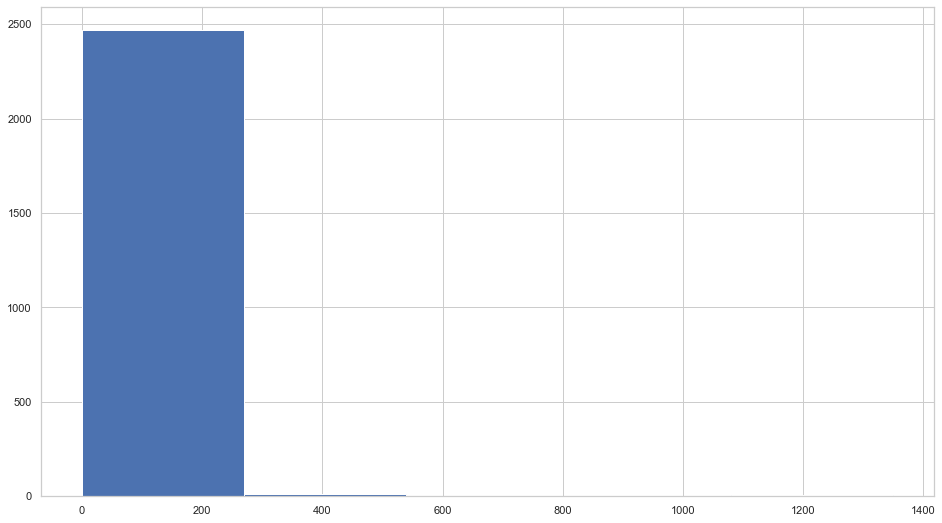

In [267]:
plt.hist(spain["amount_spent"],bins=5)
plt.show

#### Select all orders made in the month of August

In [277]:
aug = orders.loc[orders["month"]==8]
aug.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,LunchBag
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20,[]
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36,[]
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40,[]
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40,[]
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20,[]


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [283]:
aug.groupby("Country").agg({"Quantity":"count"})

,Quantity
Country,
Australia,107
Austria,88
Belgium,194
Canada,5
Channel Islands,140
Denmark,16
EIRE,593
Finland,61
France,569


#### What's the  average amount of money spent by country

In [286]:
orders.groupby("Country").agg({"amount_spent":"mean"})

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [290]:
print(orders["UnitPrice"].max())

8142.75


In [295]:
orders[orders["UnitPrice"]==8142.75]

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent,LunchBag
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75,[]


#### What was the average amount spent per year ?

In [297]:
orders.groupby("year").agg({"amount_spent":"mean"})

,amount_spent
year,
2010,21.892733
2011,22.430074
